#Lasso y árboles de regresión

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook ofrece un ejemplo de predicción de una variable continua usando Lasso y árbol de decisión como algoritmo para generar el modelo predictivo.



---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
data_x = pd.DataFrame(X)
data_y = pd.DataFrame(y)

In [5]:
# Agrega los nombres de variables para una mejor visualización de los datos. Esto no es estrictamente necesario.
data_x.columns = diabetes.feature_names
data_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [14]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

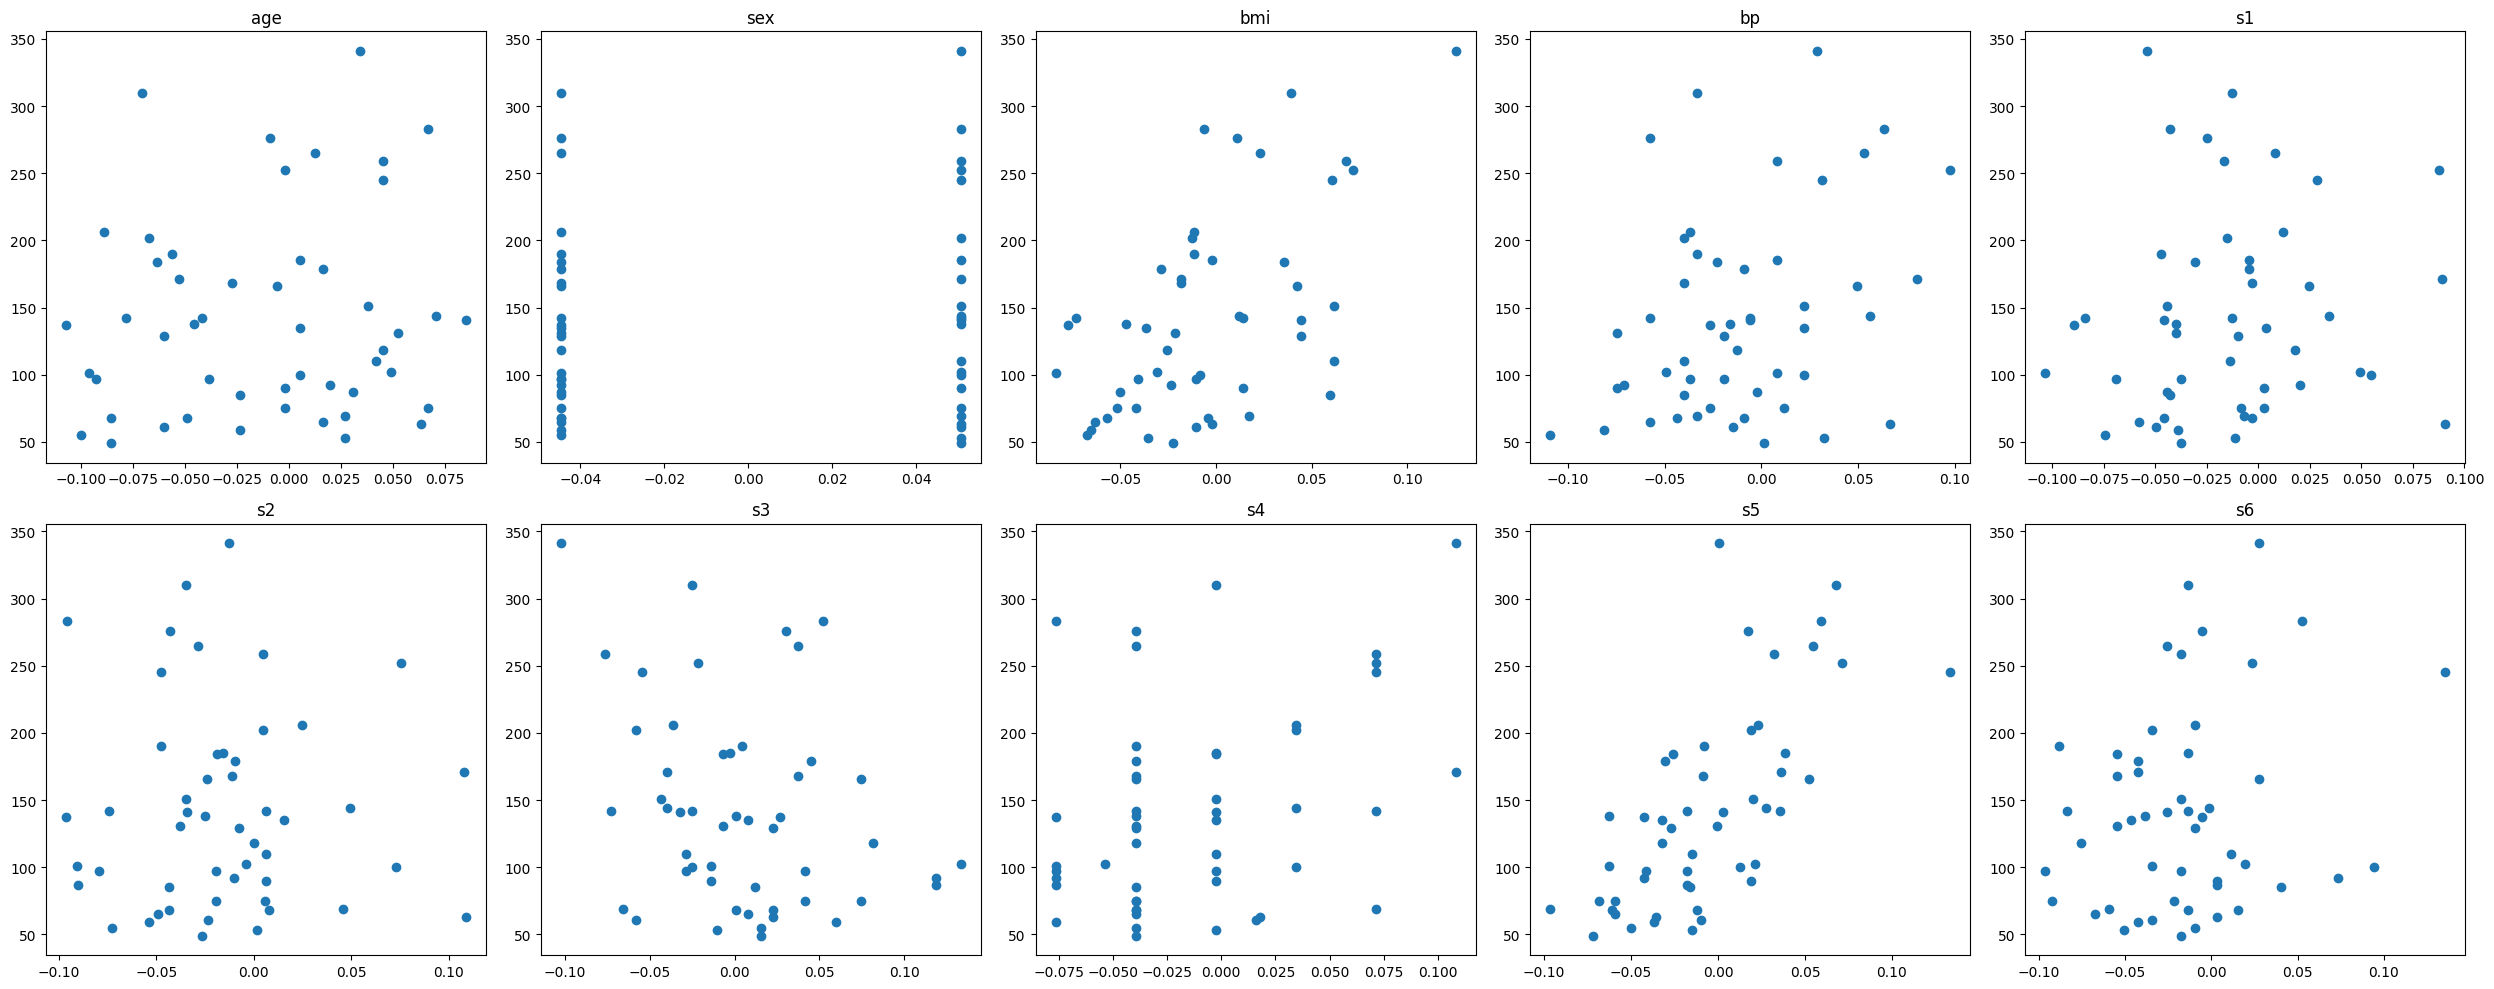

In [6]:
# Revisa la relación de cada variable con la variable Y
filas = 2
col = 5

nombres_col = diabetes.feature_names

# N es la cantidad de datos con los que se trabaja. Se usa más adelante, atención!!
N = 50
fig, axs = plt.subplots(filas, col,figsize=(25,10))

n = 0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].set_title(nombres_col[n])
        axs[i,j].scatter(data_x[nombres_col[n]][:N],data_y[:N])
        n = n+1

fig.tight_layout()

#**Regresión Lasso**

[Revisar la función Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [7]:
# Se usarán todas las variables independientes.
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=29)

In [8]:
# Crea el objeto de regresión lasso
reg_lasso = Lasso(alpha=0.1)

# Entrena el modelo con los datos de entrenamiento
reg_lasso.fit(X_train, y_train)

# Realiza predicciones de los datos de test
y_predicted = reg_lasso.predict(X_test)

# Los coeficientes
print('Coefficients: \n', 'Intercepto: ',reg_lasso.intercept_, '\nLos demás parametros betas:',reg_lasso.coef_)

# Evaluación del modelo - cálculo de métricas
# Mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predicted))

# Mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predicted))

# R2
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predicted))

Coefficients: 
 Intercepto:  [152.32662185] 
Los demas parametros betas: [  -0.         -143.53328473  531.9430643   249.86569734   -0.
   -0.         -263.63960832    0.          316.12793993  160.17417719]
Mean squared error: 2944.79
Mean absolute error: 44.31
Coefficient of determination: 0.46


---
**✅ IMPORTANTE**

---

Fijese en los valores de los coeficientes. Esta es una de las principales cualidades de este método. ¿Qué nos dice esos valores?

Suponga que se está prediciendo el valor de una vivienda uando estas variables:

+ Dimensión (expresada en metros cuadrados)
+ Cantidad de habitaciones
+ Antiguedad de la casa
+ Distancia al centro de la ciudad (expresada en kilómetros)
+ Cantidad de pisos

Al hacer la predicción Lasso entrega estos coeficientes:

+ Coeficiente de dimensión = 150
+ Coeficiente de cantidad de habitaciones = 0
+ Coeficiente de antiguedad de la casa = -30
+ Coeficiente de distancia al centro de la ciudad = -50
+ Coeficiente de cantidad de pisos = 0

La interpretación de estos coeficientes:

+ Coeficiente de dimensión = 150, cada metro cuadrado extra **aumenta** el precio en 150
+ Coeficiente de antiguedad de la casa = -30, cada año aficional de antiguedad **reduce** el precio en 30 unidades.
+ Coeficiente de distancia al centro de la ciudad = -50, cada kilometro extra lejos del centro **reduce** en precio en 50 unidades.

Las variables cuyo coeficiente es cero significa que NO aportan al modelo.

# 🧠 Tarea 🧠

Modifique algunos hiper-parámetros del modelo. Busque mejorar el modelo.

#**Árbol de regresión**

[Revisar función de árbol de regresión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

**Se usarán los mismos datos de training y testing set. Por lo que no es necesario aplicar la función train_test_split()**

In [9]:
# Crea el objeto que representa el modelo de regresión
reg_tree = DecisionTreeRegressor(max_depth=5)

# Entrena el modelo con los datos de entrenamiento
reg_tree.fit(X_train, y_train)

# Realiza predicciones de los datos de test
y_predicted = reg_tree.predict(X_test)

# Evaluación del modelo
# Mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predicted))

# Mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_predicted))

# R2
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predicted))

Mean squared error: 4305.35
Mean absolute error: 53.33
Coefficient of determination: 0.21


## Visualización del árbol

Profundidad del árbol: 5


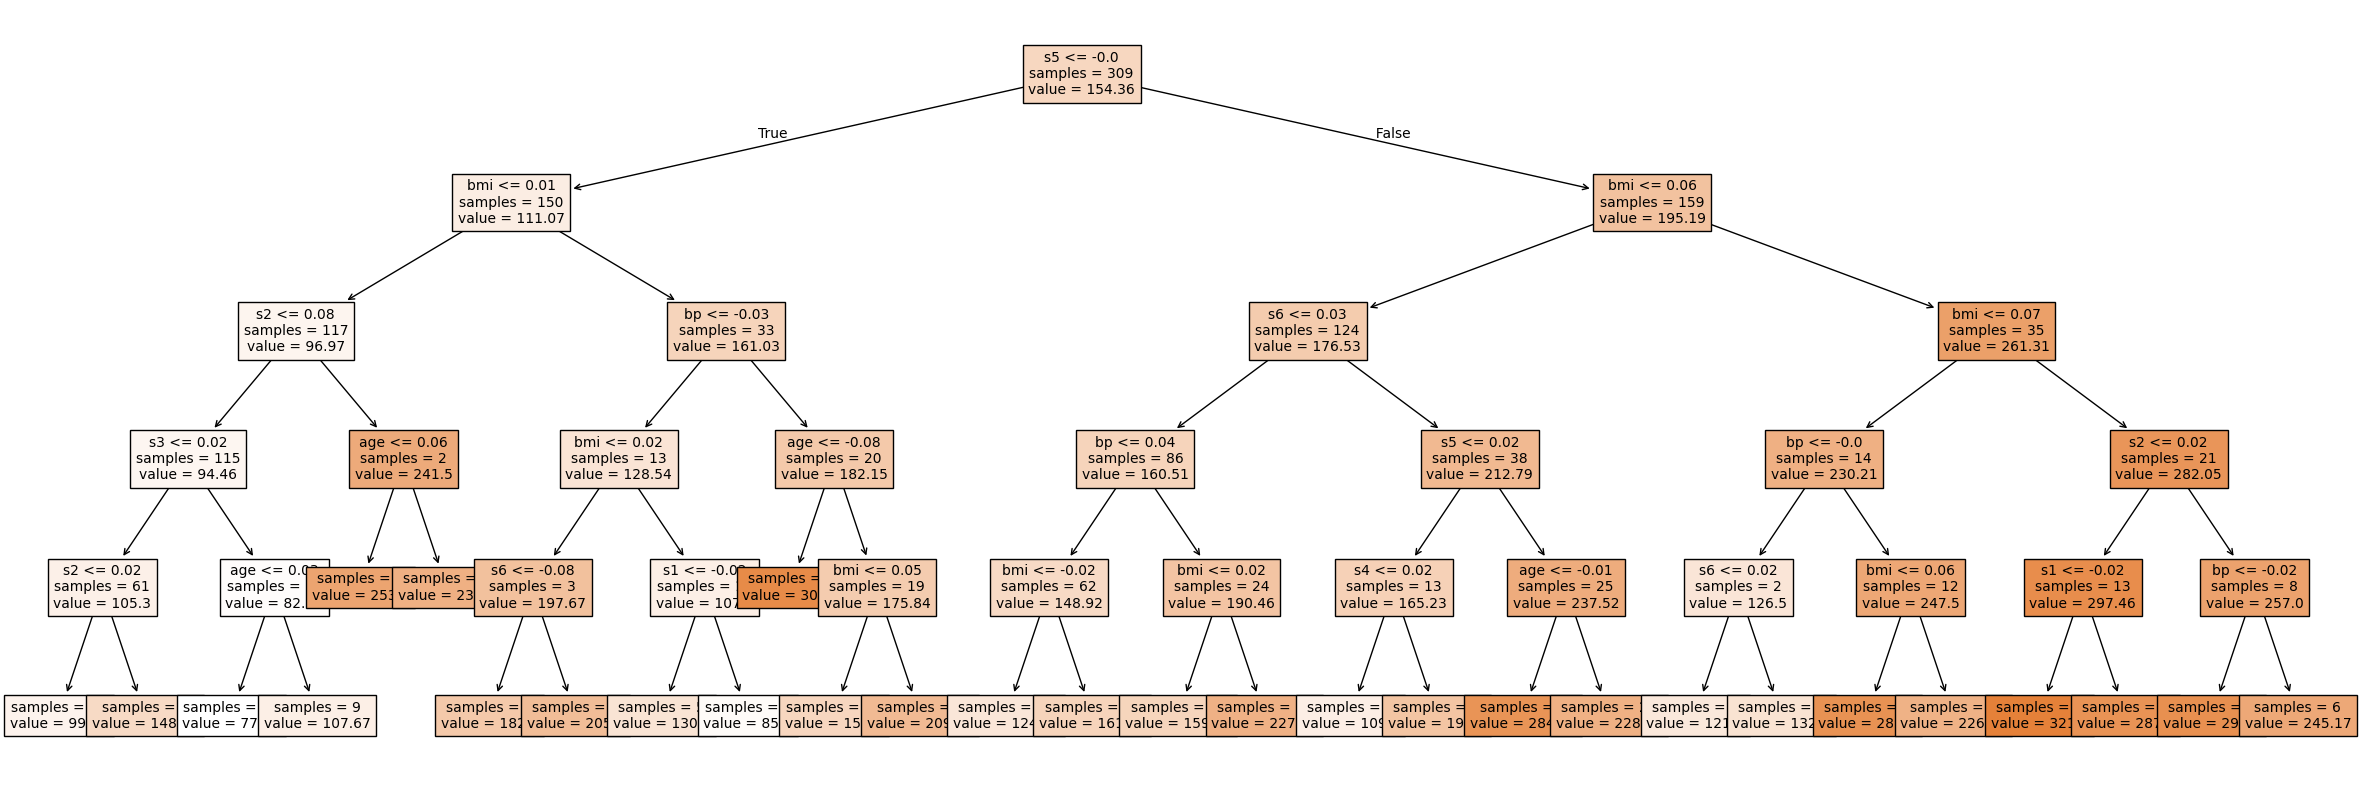

In [10]:
fig, ax = plt.subplots(figsize=(30, 10))
print('Profundidad del árbol:', reg_tree.get_depth())

plot = plot_tree(decision_tree = reg_tree,
      feature_names = data_x.columns,
      filled = True,
      impurity = False,
      fontsize = 10,
      precision = 2,
      ax = ax)

## Visualiza diferencia valor real y valor predicho

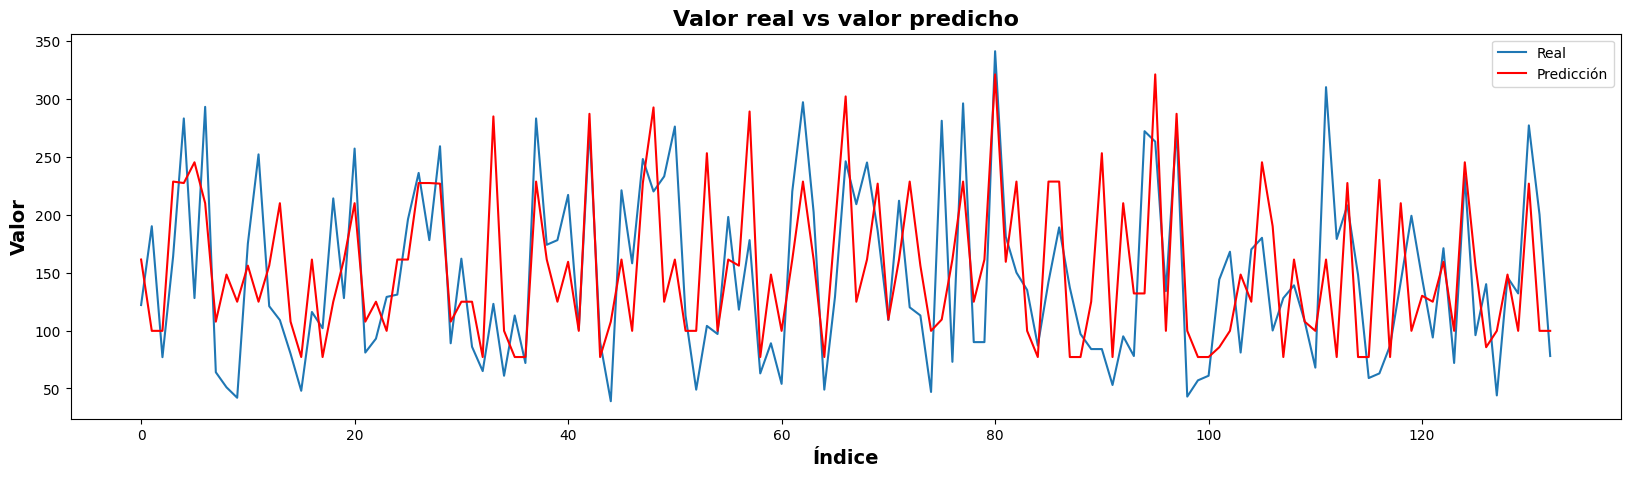

In [13]:
plt.subplots(figsize=(20,5))

plt.plot(np.array(y_test).reshape(-1,1))
plt.plot(np.array(y_predicted).reshape(-1,1), 'r')

plt.legend(['Real', 'Predicción'])
plt.title('Valor real vs valor predicho', fontsize=16, fontweight='bold')
plt.xlabel('Índice', fontsize=14, fontweight='bold')
plt.ylabel('Valor', fontsize=14, fontweight='bold')
plt.show()

Pruebe con otros valores de hiper-parámetros y vea como cambia el árbol y la predicción

Pruebe ahora crear el modelo sin parámetros (es decir, sin entregarles inputs a la función DecisionTreeRegressor).

¿Nota algo extraño en las métricas de rendimiento?

**¿Algo con R2?**

##¿Qué significa un R2 negativo?

#**INVESTIGUE y presente su respuesta a su profesor**